In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
portuguese = pd.read_csv("../../data/processed/cleaned-student-por.csv")

In [3]:
y = portuguese['final_grade']
X = portuguese.drop('final_grade', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# scaler.transform(X_train)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.8115800321982726
R-squared: 0.8906814850654576


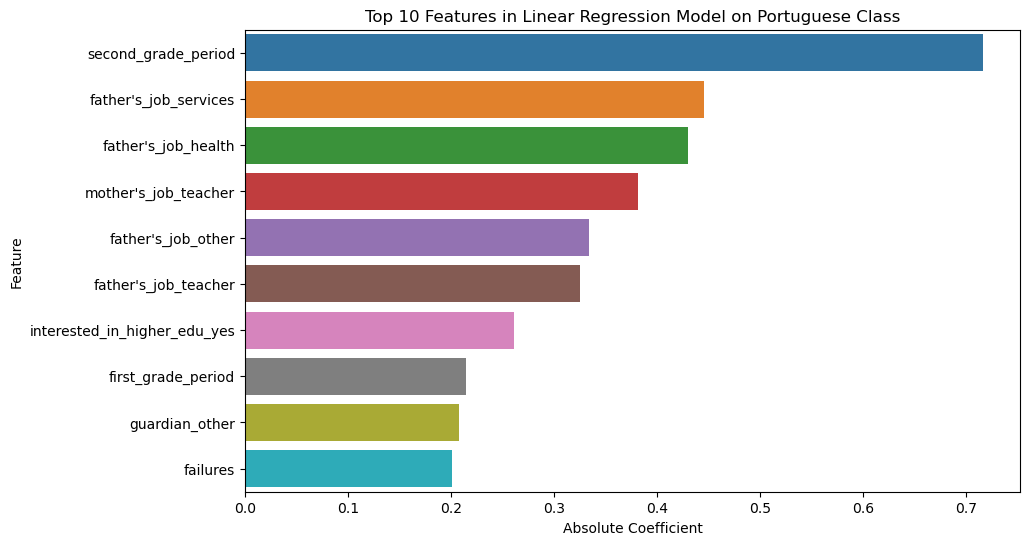

In [7]:
coefficients = model.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_names = X.columns  # Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Linear Regression Model on Portuguese Class')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

In [8]:
coef_df

,Feature,Coefficient,Abs_Coefficient
10,second_grade_period,0.716349,0.716349
19,father's_job_services,-0.445482,0.445482
17,father's_job_health,-0.429984,0.429984
16,mother's_job_teacher,0.381406,0.381406
18,father's_job_other,-0.333374,0.333374
20,father's_job_teacher,-0.325267,0.325267
23,interested_in_higher_edu_yes,0.261101,0.261101
9,first_grade_period,0.214147,0.214147
22,guardian_other,0.207614,0.207614
4,failures,-0.201126,0.201126
